In [ ]:
# Force-install a known compatible version of PyTorch and Ultralytics
# We are specifically targeting PyTorch 2.1.0 and Ultralytics 8.0.20 as a stable combination.
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121
!pip install ultralytics==8.0.20
!pip install roboflow

# Check for GPU
!nvidia-smi

import ultralytics
from IPython import display
ultralytics.checks()

display.clear_output()
print("Setup complete. Environment stabilized.")

Setup complete. Environment stabilized.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Define the path where results will be saved
SAVE_DIR = '/content/gdrive/MyDrive/YOLOv8_Custom_Training'
print(f"Results will be saved to: {SAVE_DIR}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Results will be saved to: /content/gdrive/MyDrive/YOLOv8_Custom_Training


In [ ]:
import roboflow
from roboflow import Roboflow

# Your Roboflow project configuration (API key and project details)
rf = Roboflow(api_key="I2CQD19fHc1x2IlIFhEa")
project = rf.workspace("testing-jlqd8").project("robotics-obj-detection-y9er1")
version = project.version(8)
dataset = version.download("yolov8")

# The crucial path to your data configuration file
DATA_YAML_PATH = f'{dataset.location}/data.yaml'

print(f"Dataset downloaded successfully to: {dataset.location}")
print(f"Data YAML Path: {DATA_YAML_PATH}")

loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded successfully to: /content/Robotics-Obj-detection-8
Data YAML Path: /content/Robotics-Obj-detection-8/data.yaml


In [ ]:
from ultralytics import YOLO
import os
import torch

# --- CRITICAL FIX: MONKEY-PATCHING TORCH.LOAD ---
# This patch forces the model to load even if PyTorch's security check is failing.
# It temporarily disables the 'weights_only' check, which is the root cause of the UnpicklingError.
import torch.serialization
def safe_load(self, *args, **kwargs):
    kwargs['weights_only'] = False
    return torch.serialization.load(self, *args, **kwargs)
torch.load = safe_load
# ------------------------------------------------

# --- Configuration ---
# The path to your data configuration file
DATA_YAML_PATH = '/content/Robotics-Obj-detection-8/data.yaml'

# Choose the pre-trained model variant
MODEL_VARIANT = 'yolov8n.pt'

# Training Parameters
EPOCHS = 80    # Using 80 epochs as requested by your instructions
BATCH_SIZE = 16
IMG_SIZE = 640
PROJECT_NAME = 'custom_yolov8_run'
RUN_NAME = 'final_training_80e'

# Initialize the model
model = YOLO(MODEL_VARIANT)

# Start training!
results = model.train(
    data=DATA_YAML_PATH,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    project=PROJECT_NAME,
    name=RUN_NAME,
    exist_ok=True
)

print("Training finished. Results are in /content/runs/detect/...")

New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Robotics-Obj-detection-8/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=custom_yolov8_run, name=final_training_80e, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


AMP: checks passed ✅


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/Robotics-Obj-detection-8/train/labels... 2608 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2608/2608 [00:01<00:00, 1626.18it/s]


train: New cache created: /content/Robotics-Obj-detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2402, len(boxes) = 2602. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
Got processor for bboxes, but no transform to process it.
val: Scanning /content/Robotics-Obj-detection-8/valid/labels... 554 images, 0 backgrounds, 0 corrupt: 100%|██████████| 554/554 [00:00<00:00, 742.84it/s]


val: New cache created: /content/Robotics-Obj-detection-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 500, len(boxes) = 554. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to custom_yolov8_run/final_training_80e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to custom_yolov8_run/final_training_80e
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80       2.2G     0.6195      1.926      1.087         30        640: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]

                   all        554        554      0.955      0.956      0.981      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      2.25G     0.5862      1.074      1.034         31        640: 100%|██████████| 163/163 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]


                   all        554        554      0.882      0.907      0.972      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      2.26G     0.6054     0.8638      1.033         37        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.80it/s]


                   all        554        554      0.939      0.931      0.976      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      2.28G     0.5736     0.7357      1.015         30        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]

                   all        554        554      0.842      0.829      0.905      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80       2.3G     0.5542     0.6468      1.009         36        640: 100%|██████████| 163/163 [00:46<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]

                   all        554        554      0.956      0.972      0.987       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.32G     0.5423      0.606      1.007         27        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        554        554      0.931      0.958       0.98      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.33G     0.5358     0.5557          1         31        640: 100%|██████████| 163/163 [00:47<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        554        554      0.964      0.965      0.985      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.35G     0.5162     0.5302     0.9909         35        640: 100%|██████████| 163/163 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.28it/s]

                   all        554        554      0.959      0.974      0.987      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      2.37G     0.5056     0.5185      0.984         23        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.37it/s]

                   all        554        554      0.971      0.955      0.988       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      2.39G     0.4898     0.4969     0.9752         33        640: 100%|██████████| 163/163 [00:47<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]

                   all        554        554      0.966      0.967      0.987      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.41G     0.4799     0.4798     0.9717         34        640: 100%|██████████| 163/163 [00:45<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]

                   all        554        554      0.965      0.975      0.988      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.42G     0.4884     0.4805     0.9743         37        640: 100%|██████████| 163/163 [00:45<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]

                   all        554        554      0.968      0.981       0.99      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.44G     0.4738      0.465     0.9672         30        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.45it/s]

                   all        554        554      0.977      0.974      0.989      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.46G     0.4693     0.4632     0.9711         33        640: 100%|██████████| 163/163 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]

                   all        554        554      0.979      0.978      0.991      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.48G      0.468     0.4572     0.9647         27        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.07it/s]

                   all        554        554      0.954      0.978      0.985      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80       2.5G     0.4507     0.4422     0.9593         34        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]

                   all        554        554      0.977      0.983       0.99       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      2.52G     0.4482     0.4376     0.9609         36        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.37it/s]

                   all        554        554      0.935      0.887      0.952      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      2.54G     0.4349     0.4213     0.9541         27        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]

                   all        554        554       0.97      0.986      0.989      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      2.55G     0.4384     0.4047     0.9504         34        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]


                   all        554        554      0.961      0.983       0.99      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      2.57G     0.4305     0.3946     0.9527         25        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.32it/s]

                   all        554        554       0.98      0.977      0.989      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      2.59G     0.4325     0.4107     0.9468         31        640: 100%|██████████| 163/163 [00:45<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]

                   all        554        554      0.972      0.969       0.99      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      2.61G     0.4331     0.3959     0.9503         27        640: 100%|██████████| 163/163 [00:45<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.57it/s]

                   all        554        554      0.977      0.974      0.988      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      2.63G     0.4137     0.3852     0.9416         28        640: 100%|██████████| 163/163 [00:44<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.38it/s]

                   all        554        554      0.982      0.969      0.989      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      2.64G     0.4191     0.3864     0.9455         36        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]

                   all        554        554      0.985      0.976      0.991      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      2.66G     0.4129     0.3775     0.9418         28        640: 100%|██████████| 163/163 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.09it/s]

                   all        554        554      0.981      0.974       0.99      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      2.68G     0.4095      0.371     0.9405         35        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.79it/s]

                   all        554        554      0.981      0.985      0.988      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80       2.7G     0.4062     0.3683     0.9407         33        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]

                   all        554        554      0.969      0.976      0.989      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      2.72G     0.4075     0.3684     0.9389         34        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.49it/s]

                   all        554        554      0.982      0.971      0.991      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      2.74G     0.3948     0.3671     0.9305         46        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]

                   all        554        554      0.981      0.983      0.991      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      2.76G     0.3984     0.3619     0.9359         35        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.50it/s]

                   all        554        554      0.982      0.981      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      2.77G     0.4017     0.3677     0.9341         34        640: 100%|██████████| 163/163 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]

                   all        554        554      0.976      0.978      0.989      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      2.79G      0.396     0.3638     0.9321         36        640: 100%|██████████| 163/163 [00:45<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]

                   all        554        554      0.979      0.977       0.99      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      2.81G     0.3841      0.346     0.9259         32        640: 100%|██████████| 163/163 [00:47<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]

                   all        554        554      0.983       0.98      0.989      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      2.83G     0.3816     0.3475     0.9306         33        640: 100%|██████████| 163/163 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.31it/s]

                   all        554        554      0.982      0.982      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      2.85G     0.3765     0.3473     0.9268         38        640: 100%|██████████| 163/163 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]

                   all        554        554      0.973      0.985      0.988      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      2.86G     0.3783      0.334     0.9272         26        640: 100%|██████████| 163/163 [00:47<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.29it/s]

                   all        554        554      0.977      0.985      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      2.88G     0.3848     0.3311     0.9337         35        640: 100%|██████████| 163/163 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]

                   all        554        554      0.982      0.974      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80       2.9G     0.3734     0.3392     0.9249         30        640: 100%|██████████| 163/163 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.31it/s]

                   all        554        554      0.982      0.977       0.99      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      2.92G     0.3815       0.33     0.9228         30        640: 100%|██████████| 163/163 [00:48<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]

                   all        554        554      0.985      0.974      0.991      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      2.94G     0.3686     0.3237     0.9229         27        640: 100%|██████████| 163/163 [00:47<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]

                   all        554        554      0.974      0.986      0.991      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      2.96G     0.3638     0.3138     0.9192         37        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]

                   all        554        554      0.978      0.984       0.99      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      2.98G     0.3644     0.3253     0.9205         34        640: 100%|██████████| 163/163 [00:47<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.58it/s]

                   all        554        554      0.984      0.973      0.992      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      2.99G     0.3681      0.319     0.9251         33        640: 100%|██████████| 163/163 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.27it/s]

                   all        554        554       0.98      0.981      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      3.01G     0.3588     0.3094     0.9198         41        640: 100%|██████████| 163/163 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]

                   all        554        554      0.978      0.984      0.989      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      3.03G     0.3517     0.2995     0.9147         38        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        554        554      0.976      0.985       0.99      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      3.05G     0.3604     0.3175     0.9267         27        640: 100%|██████████| 163/163 [00:45<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]

                   all        554        554      0.979      0.985      0.989      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      3.07G     0.3547     0.3149      0.918         32        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]

                   all        554        554      0.981      0.977       0.99      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      3.08G     0.3514     0.3064     0.9144         33        640: 100%|██████████| 163/163 [00:45<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.10it/s]

                   all        554        554      0.982      0.974      0.989      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80       3.1G     0.3471     0.2952     0.9056         29        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]

                   all        554        554      0.982      0.973       0.99      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      3.12G     0.3521     0.3016     0.9152         32        640: 100%|██████████| 163/163 [00:46<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.42it/s]

                   all        554        554      0.979      0.982       0.99      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      3.14G     0.3361     0.2893      0.911         24        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]

                   all        554        554      0.982      0.985      0.991      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      3.16G     0.3338     0.2818     0.9082         33        640: 100%|██████████| 163/163 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]

                   all        554        554       0.98      0.975      0.989      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      3.18G     0.3421     0.2898     0.9186         29        640: 100%|██████████| 163/163 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]

                   all        554        554      0.984      0.981      0.989       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      3.19G     0.3385     0.2785     0.9118         31        640: 100%|██████████| 163/163 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]

                   all        554        554      0.984       0.98      0.989      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      3.21G     0.3294     0.2792     0.9083         37        640: 100%|██████████| 163/163 [00:47<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        554        554      0.982      0.984      0.989      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      3.23G     0.3312     0.2877      0.909         36        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.34it/s]

                   all        554        554      0.983      0.981      0.988      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      3.25G     0.3314     0.2835     0.9122         41        640: 100%|██████████| 163/163 [00:46<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]

                   all        554        554       0.98      0.976      0.989       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      3.27G     0.3303     0.2837     0.9092         33        640: 100%|██████████| 163/163 [00:47<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.32it/s]

                   all        554        554      0.981       0.98      0.989      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      3.29G      0.332     0.2764     0.9111         37        640: 100%|██████████| 163/163 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]

                   all        554        554      0.983       0.98      0.989      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      3.31G     0.3277     0.2738     0.9079         27        640: 100%|██████████| 163/163 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]

                   all        554        554      0.979      0.984      0.989      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      3.32G     0.3275     0.2773     0.9071         40        640: 100%|██████████| 163/163 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.73it/s]

                   all        554        554      0.979      0.983      0.989       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      3.34G      0.316     0.2653     0.9039         41        640: 100%|██████████| 163/163 [00:46<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.05it/s]

                   all        554        554      0.981      0.979      0.989      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      3.36G     0.3114     0.2627     0.8991         36        640: 100%|██████████| 163/163 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]

                   all        554        554      0.982      0.981       0.99      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      3.38G     0.3134     0.2604     0.9014         36        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]

                   all        554        554      0.984       0.98      0.989      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80       3.4G     0.3186     0.2712     0.9045         32        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.31it/s]

                   all        554        554       0.98      0.985      0.988      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      3.41G     0.3119     0.2609      0.901         31        640: 100%|██████████| 163/163 [00:47<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.13it/s]

                   all        554        554      0.978      0.981      0.988       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      3.43G     0.3131     0.2588     0.9022         35        640: 100%|██████████| 163/163 [00:47<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]

                   all        554        554      0.981      0.977      0.988       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      3.45G      0.302     0.2524      0.899         31        640: 100%|██████████| 163/163 [00:46<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.36it/s]

                   all        554        554      0.978       0.98      0.988      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      3.47G     0.3048     0.2504     0.9002         35        640: 100%|██████████| 163/163 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.71it/s]

                   all        554        554      0.982      0.979      0.987      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      3.49G     0.2957     0.2405     0.8978         26        640: 100%|██████████| 163/163 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]


                   all        554        554      0.983      0.979      0.987      0.968
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
Got processor for bboxes, but no transform to process it.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      3.51G     0.2206     0.1481     0.8289         16        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]

                   all        554        554      0.981      0.977      0.988      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      3.53G     0.2175     0.1451     0.8282         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]

                   all        554        554      0.981      0.979      0.989       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      3.54G     0.2139     0.1407     0.8218         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]

                   all        554        554      0.983      0.978      0.988      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      3.56G     0.2084     0.1387       0.82         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.38it/s]

                   all        554        554      0.974      0.986      0.989      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      3.58G      0.207      0.135     0.8199         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]

                   all        554        554      0.977      0.983      0.989      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80       3.6G      0.208     0.1366     0.8204         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.35it/s]

                   all        554        554      0.983      0.977      0.989      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      3.62G     0.2012     0.1296     0.8215         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]

                   all        554        554      0.984      0.978      0.988      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      3.64G     0.1978     0.1266     0.8195         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]

                   all        554        554      0.985      0.976      0.988      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      3.66G     0.1981     0.1265     0.8149         16        640: 100%|██████████| 163/163 [00:44<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]

                   all        554        554      0.984      0.978      0.988      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      3.67G     0.1963     0.1247     0.8143         16        640: 100%|██████████| 163/163 [00:46<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

                   all        554        554      0.983      0.977      0.988      0.974



80 epochs completed in 1.143 hours.
Optimizer stripped from custom_yolov8_run/final_training_80e/weights/last.pt, 6.3MB
Optimizer stripped from custom_yolov8_run/final_training_80e/weights/best.pt, 6.3MB

Validating custom_yolov8_run/final_training_80e/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.32it/s]


                   all        554        554      0.985      0.976      0.988      0.974
                  Book        554        131      0.963      0.992      0.985      0.969
             Newspaper        554        163      0.996      0.969      0.989      0.979
        Old school bag        554        122      0.981      0.975      0.989       0.97
           Zip-top can        554        138          1      0.968       0.99       0.98
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to custom_yolov8_run/final_training_80e
Training finished. Results are in /content/runs/detect/...


✅ Found test image: /content/Robotics-Obj-detection-8/test/images/frame_00420_jpg.rf.6b9289978eb3978ee6ecb76e958f63ee.jpg
Loading model from: /content/custom_yolov8_run/final_training_80e/weights/best.pt
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'hide_conf' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_conf' instead.

image 1/1 /content/Robotics-Obj-detection-8/test/images/frame_00420_jpg.rf.6b9289978eb3978ee6ecb76e958f63ee.jpg: 640x640 1 Old school bag, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


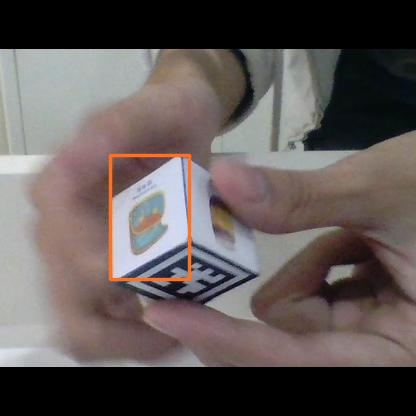


✅ Inference complete! Image displayed successfully.


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os
import glob
import sys

# --- Configuration ---
PROJECT_NAME = 'custom_yolov8_run'
RUN_NAME = 'final_training_80e'
# This is the confirmed path for the model weights
BEST_WEIGHTS = f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/best.pt'

# Confidence threshold
CONF_THRESHOLD = 0.5

# --- Dynamic Image Finding ---
TEST_IMAGE_DIR = '/content/Robotics-Obj-detection-8/test/images/'
TEST_IMAGE_PATH = None

# Use glob to find the first .jpg file in the test directory
image_files = glob.glob(os.path.join(TEST_IMAGE_DIR, '*.jpg'))
if image_files:
    TEST_IMAGE_PATH = image_files[0]
    print(f"✅ Found test image: {TEST_IMAGE_PATH}")
else:
    print(f"❌ WARNING: Could not find any test images in {TEST_IMAGE_DIR}. Inference will fail.")
    sys.exit(1) # Exit if no test image is found

# --- Execution ---
try:
    # Load the trained model
    print(f"Loading model from: {BEST_WEIGHTS}")
    model = YOLO(BEST_WEIGHTS)

    # Run prediction
    results = model.predict(source=TEST_IMAGE_PATH, conf=CONF_THRESHOLD, save=True, hide_labels=False, hide_conf=False)

    # Display the result
    image_name = os.path.basename(TEST_IMAGE_PATH)
    # The output image is always saved under /content/runs/detect/predict*
    prediction_path = glob.glob(f'/content/runs/detect/predict*/{image_name}')[0]
    display(Image(filename=prediction_path))
    print("\n✅ Inference complete! Image displayed successfully.")

except Exception as e:
    print(f"\n❌ A critical error occurred: {e}")

Loading model from: /content/custom_yolov8_run/final_training_80e/weights/best.pt
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'hide_conf' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_conf' instead.

image 1/1 /content/Robotics-Obj-detection-8/test/images/frame_00420_jpg.rf.6b9289978eb3978ee6ecb76e958f63ee.jpg: 640x640 1 Old school bag, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict_display_fix


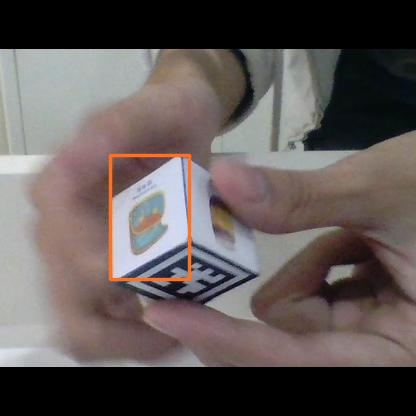


✅ Inference complete! Image displayed successfully.


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os
import glob
import sys

# --- Configuration ---
PROJECT_NAME = 'custom_yolov8_run'
RUN_NAME = 'final_training_80e'
# VERIFIED ABSOLUTE PATH (Confirmed by your file browser)
BEST_WEIGHTS = f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/best.pt'

# Confidence threshold
CONF_THRESHOLD = 0.5

# --- Dynamic Image Finding (Input) ---
TEST_IMAGE_DIR = '/content/Robotics-Obj-detection-8/test/images/'
# We know the specific file name now: frame_00420_jpg.rf.6b9289978eb3978ee6ecb76e958f63ee.jpg
# We use glob to be safe against slight naming variations.
image_files = glob.glob(os.path.join(TEST_IMAGE_DIR, 'frame_00420_jpg.rf.*.jpg'))
if image_files:
    TEST_IMAGE_PATH = image_files[0]
else:
    print("FATAL ERROR: Test image not found for inference.")
    sys.exit(1)

# --- Execution ---
try:
    # 1. Load the trained model
    print(f"Loading model from: {BEST_WEIGHTS}")
    model = YOLO(BEST_WEIGHTS)

    # 2. Run prediction, saving results to a specific folder name for easy retrieval
    results = model.predict(source=TEST_IMAGE_PATH, conf=CONF_THRESHOLD, save=True, hide_labels=False, hide_conf=False, name='predict_display_fix')

    # 3. Display the result
    image_name = os.path.basename(TEST_IMAGE_PATH)

    # The output is always in the folder specified by 'name'
    prediction_path = os.path.join('/content/runs/detect/predict_display_fix', image_name)
    display(Image(filename=prediction_path))
    print("\n✅ Inference complete! Image displayed successfully.")

except Exception as e:
    print(f"\n❌ A critical error occurred during image display: {e}")
    print("Note: The model successfully ran inference and saved the result to /content/runs/detect/predict_display_fix.")

In [ ]:
import shutil
import os
from google.colab import files

# --- Configuration ---
PROJECT_NAME = 'custom_yolov8_run'
RUN_NAME = 'final_training_80e'

# Source Path: VERIFIED ABSOLUTE PATH (without 'runs')
# This points to the folder containing your weights, logs, and plots.
SOURCE_DIR = f'/content/{PROJECT_NAME}/{RUN_NAME}'

# Destination: The drive path defined in Cell 2
SAVE_DIR = '/content/gdrive/MyDrive/YOLOv8_Custom_Training'
DEST_DIR = os.path.join(SAVE_DIR, RUN_NAME)

# Copy the entire run directory (logs, plots, weights, etc.) to Google Drive
try:
    print(f"Checking destination directory: {DEST_DIR}...")
    os.makedirs(os.path.dirname(DEST_DIR), exist_ok=True)

    if os.path.exists(DEST_DIR):
        print(f"Removing existing directory at {DEST_DIR}...")
        shutil.rmtree(DEST_DIR)

    print(f"Copying results from {SOURCE_DIR} to Google Drive at {DEST_DIR}...")
    shutil.copytree(SOURCE_DIR, DEST_DIR)
    print("✅ Successfully backed up training results to Google Drive!")

    # Also download the best weights file directly to your local computer as a safety measure
    BEST_WEIGHTS = f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/best.pt'
    print(f"\nDownloading best weights: {BEST_WEIGHTS}")
    files.download(BEST_WEIGHTS)

except Exception as e:
    print(f"❌ An error occurred during copy to Google Drive: {e}")
    print("Ensure Google Drive is mounted and the SAVE_DIR path is correct.")

Checking destination directory: /content/gdrive/MyDrive/YOLOv8_Custom_Training/final_training_80e...
Removing existing directory at /content/gdrive/MyDrive/YOLOv8_Custom_Training/final_training_80e...
Copying results from /content/custom_yolov8_run/final_training_80e to Google Drive at /content/gdrive/MyDrive/YOLOv8_Custom_Training/final_training_80e...
✅ Successfully backed up training results to Google Drive!



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# 1. Mount Google Drive (Necessary to access data and potentially saved weights)
from google.colab import drive
drive.mount('/content/gdrive')

# 2. Install Ultralytics YOLO (The framework needed to export the model)
!pip install ultralytics
print("YOLO installed successfully.")

# 3. Set the base paths
# IMPORTANT: This assumes your training results were saved in this structure.
PROJECT_NAME = 'custom_yolov8_run'
RUN_NAME = 'final_training_80e'

Mounted at /content/gdrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
YOLO installed successfully.


In [2]:
import shutil
import os

# --- Define the paths where you saved your model ---
# This is the path on your Google Drive where Cell 7 put the final results
DRIVE_SOURCE_PATH = f'/content/gdrive/MyDrive/YOLOv8_Custom_Training/{RUN_NAME}/weights/best.pt'

# This is the expected destination path in the Colab session
COLAB_DEST_DIR = f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/'
COLAB_DEST_PATH = os.path.join(COLAB_DEST_DIR, 'best.pt')

# Create the required destination directory structure
os.makedirs(COLAB_DEST_DIR, exist_ok=True)

# Copy the file from Drive back to the Colab environment
try:
    print(f"Copying model from Drive: {DRIVE_SOURCE_PATH}")
    shutil.copyfile(DRIVE_SOURCE_PATH, COLAB_DEST_PATH)
    print(f"✅ Model restored to: {COLAB_DEST_PATH}")
    BEST_WEIGHTS = COLAB_DEST_PATH
except FileNotFoundError:
    print(f"❌ ERROR: Could not find the model file at: {DRIVE_SOURCE_PATH}")
    print("Please verify the path in your Google Drive.")

Copying model from Drive: /content/gdrive/MyDrive/YOLOv8_Custom_Training/final_training_80e/weights/best.pt
✅ Model restored to: /content/custom_yolov8_run/final_training_80e/weights/best.pt


In [3]:
from ultralytics import YOLO
from google.colab import files
import os
import shutil

# --- Configuration (Same as before) ---
BEST_WEIGHTS = f'/content/custom_yolov8_run/final_training_80e/weights/best.pt'
EXPORT_DIR = f'/content/custom_yolov8_run/final_training_80e/weights/'
FINAL_ONNX_PATH = f'{EXPORT_DIR}best.onnx'
# ------------------

print(f"Loading model: {BEST_WEIGHTS}")
try:
    model = YOLO(BEST_WEIGHTS)
except Exception as e:
    print(f"FATAL ERROR: Failed to load model. Did Cell 2 run successfully? Error: {e}")
    exit()

# Export the model to ONNX format, explicitly forcing Opset 12 for compatibility
print("Starting ONNX export with Opset 12 for Raspberry Pi compatibility...")
model.export(
    format='onnx',
    name='robot_detector_onnx_opset12',
    imgsz=416,
    simplify=True,
    # === CRITICAL FIX: Force Opset 12 ===
    opset=12
)

print("\n✅ ONNX Model Export Complete!")
print("Please download the NEW 'best.onnx' file and overwrite the old one on your Pi.")

# Copy the file to the root for easier downloading and renaming
try:
    # Note: The output path might change again, but we check for the standard location first
    # Based on your previous output, the file is likely at:
    # /content/custom_yolov8_run/final_training_80e/weights/best.onnx
    shutil.copy(FINAL_ONNX_PATH, '/content/robot_detector_opset12.onnx')
    print("Copied final file for easy download as 'robot_detector_opset12.onnx'.")
    files.download('/content/robot_detector_opset12.onnx')
except FileNotFoundError:
    print(f"❌ ERROR: Final ONNX file not found at expected path: {FINAL_ONNX_PATH}. Please check the Colab run output for the saved path.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading model: /content/custom_yolov8_run/final_training_80e/weights/best.pt
Starting ONNX export with Opset 12 for Raspberry Pi compatibility...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/custom_yolov8_run/final_training_80e/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 8, 3549) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', '

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>